In [1]:
import os
import sys
import glob
import numpy as np
import image_preprocessing
import cnn
import bayesian_network
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools

%matplotlib inline  

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
classes = {"Positive": 0, "Neutral": 1, "Negative": 2, "None": 3}
def classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list):
    with open('val_labels.json', mode='r', encoding='utf-8') as f:
        image_labels_dict = json.load(f)
    labels = image_labels_dict[image_name]

    print("RadhaKrishna")
#     print(labels)

    # preprocess the image
    image_preprocessing.preprocess(image_folder_path, image_name)

    # get mean cnn predictions for the faces from the image
    cnn_label, cnn_dict, faces_detected = cnn.predict_image(cnn_model, image_folder_path + "Aligned/", image_name)

    # get the bayesian and bayesian + cnn predictions for the image
    bayesian_label, bayesian_cnn_label, emotion_dict, emotion_cnn_dict = bayesian_network.inference(bayesian_model, labels_list, labels, cnn_label)

    print("Faces detected: " + str(faces_detected))
    print("Real Label: " + str(real_label))
    print("CNN Label: " + str(cnn_label))
    print("Bayesian Label: " + str(bayesian_label))
    print("Bayesian + CNN Label: " + str(bayesian_cnn_label))

    return classes[real_label], classes[str(cnn_label)], classes[str(bayesian_label)], classes[str(bayesian_cnn_label)], faces_detected

In [4]:
print("RadhaKrishna")
cnn_model = cnn.load_model()
bayesian_model, labels_list = bayesian_network.load_model()

Instructions for updating:
Colocations handled automatically by placer.


RadhaKrishna


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Loaded CNN model from disk
True


In [5]:
def evaluate(image_folder_path, real_label):
    print("RadhaKrishna")
    predictions = []
    i = 0
    for file in sorted(glob.glob(image_folder_path + "*.jpg")):
        image_name = (file.split('/'))[-1]
        print("Image: " + image_name)
        prediction = {"Image": image_name}
        prediction["Actual"], prediction["CNN"], prediction["Bayesian"], prediction["Bayesian + CNN"], prediction["Faces Detected"] = classify_image(image_folder_path, image_name, real_label, cnn_model, bayesian_model, labels_list)
        predictions.append(prediction)
        i+=1
        if (i==100): 
            break
    return predictions

In [6]:
class_list = ['Positive', 'Neutral', 'Negative']
predictions_list = []
for emotion_class in class_list:
    predictions = evaluate('input/val/' + emotion_class + '/', emotion_class)
    predictions_list += predictions
    break
df = pd.DataFrame(predictions_list)
df.head()

RadhaKrishna
Image: pos_1.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.3618 │
├───────────┼────────────────┤
│ Emotion_1 │         0.2120 │
├───────────┼────────────────┤
│ Emotion_2 │         0.4262 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Positive
Image: pos_10.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.9998 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0001 │
├───────────┼────────────────┤
│ Emotion_2 │         0.0001 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_100.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotio

╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.5853 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0001 │
├───────────┼────────────────┤
│ Emotion_2 │         0.4145 │
╘═══════════╧════════════════╛
Faces detected: False
Real Label: Positive
CNN Label: None
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1016.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.0049 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0011 │
├───────────┼────────────────┤
│ Emotion_2 │         0.9940 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: pos_1017.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.3771 │
├───────────┼────────

Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1033.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.0276 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0012 │
├───────────┼────────────────┤
│ Emotion_2 │         0.9712 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Neutral
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: pos_1034.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.0006 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0000 │
├───────────┼────────────────┤
│ Emotion_2 │         0.9994 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: pos_1035.jpg
RadhaKr

╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.7618 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0008 │
├───────────┼────────────────┤
│ Emotion_2 │         0.2374 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1051.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.9855 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0000 │
├───────────┼────────────────┤
│ Emotion_2 │         0.0145 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1052.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.9582 │
├───────────┼───

╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.0934 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0000 │
├───────────┼────────────────┤
│ Emotion_2 │         0.9066 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral
Image: pos_107.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.2827 │
├───────────┼────────────────┤
│ Emotion_1 │         0.2338 │
├───────────┼────────────────┤
│ Emotion_2 │         0.4835 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Positive
Image: pos_1070.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.0724 │
├───────────┼───────

Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Positive
Bayesian + CNN Label: Positive
Image: pos_1087.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.1562 │
├───────────┼────────────────┤
│ Emotion_1 │         0.4668 │
├───────────┼────────────────┤
│ Emotion_2 │         0.3770 │
╘═══════════╧════════════════╛
Faces detected: False
Real Label: Positive
CNN Label: None
Bayesian Label: Negative
Bayesian + CNN Label: Negative
Image: pos_1088.jpg
RadhaKrishna
╒═══════════╤════════════════╕
│ Emotion   │   phi(Emotion) │
╞═══════════╪════════════════╡
│ Emotion_0 │         0.0950 │
├───────────┼────────────────┤
│ Emotion_1 │         0.0019 │
├───────────┼────────────────┤
│ Emotion_2 │         0.9030 │
╘═══════════╧════════════════╛
Faces detected: True
Real Label: Positive
CNN Label: Positive
Bayesian Label: Neutral
Bayesian + CNN Label: Neutral


,Actual,Bayesian,Bayesian + CNN,CNN,Faces Detected,Image
0,0,1,0,0,True,pos_1.jpg
1,0,0,0,0,True,pos_10.jpg
2,0,1,0,0,True,pos_100.jpg
3,0,0,0,3,False,pos_1000.jpg
4,0,1,1,0,True,pos_1001.jpg


In [7]:
df.to_pickle('predictions_100')

In [8]:
df = pd.read_pickle('predictions')

In [9]:
y_true = df[["Actual"]]
y_pred_cnn = df[["CNN"]]
y_pred_bayesian = df[["Bayesian"]]
y_pred_bayesian_cnn = df[["Bayesian + CNN"]]

Confusion matrix, without normalization
[[75  7  3 15]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


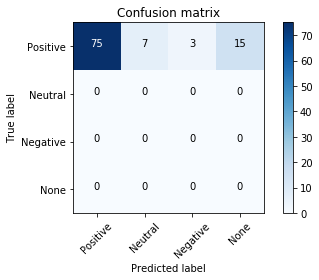

In [10]:
cm = confusion_matrix(y_true, y_pred_cnn)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

Confusion matrix, without normalization
[[58 39  3]
 [ 0  0  0]
 [ 0  0  0]]


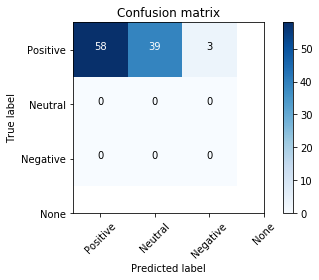

In [11]:
cm = confusion_matrix(y_true, y_pred_bayesian)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

Confusion matrix, without normalization
[[74 25  1]
 [ 0  0  0]
 [ 0  0  0]]


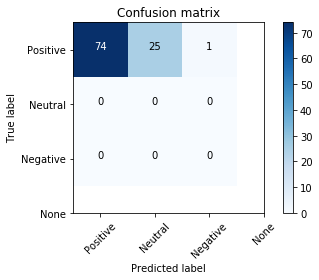

In [12]:
cm = confusion_matrix(y_true, y_pred_bayesian_cnn)
plt.figure()
plot_confusion_matrix(cm, classes=classes)
plt.show()

### CNN Accuracy

In [13]:
accuracy_score(y_true, y_pred_cnn)

0.75

### Bayesian Network Accuracy

In [14]:
accuracy_score(y_true, y_pred_bayesian)

0.58

### Bayesian + CNN Accuracy

In [15]:
accuracy_score(y_true, y_pred_bayesian_cnn)

0.74